In [36]:
import numpy as np 
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import missingno as msno #visualises missing values
from wordcloud import WordCloud #to find the most frequent words 

In [37]:
#data that was scraped from source
scrape = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

#### Pre-Processing(data cleaning):
- loading
- peeking
- general info

In [38]:
#loading data 
df = pd.read_csv(scrape)

/var/folders/0m/sz8j8cn52wl69dlv6r81z4f00000gn/T/ipykernel_29276/1039849880.py:2: DtypeWarning: Columns (12,14,18,21,24,25,29,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(scrape)


In [39]:
df.head()

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18


In [40]:
df.tail() #addressed results a few lines down

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
39307,E2741,suspected,Kwara,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
39308,E2742,suspected,Kwara,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
39309,E2743,suspected,Gombe,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
39310,E2744,suspected,Nasarawa,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
39311,E2745,suspected,Rivers,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12


In [41]:
#number of countries with monkeypox cases
len(df["Country"].unique())

115

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39312 entries, 0 to 39311
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       39312 non-null  object 
 1   Status                   39312 non-null  object 
 2   Location                 27545 non-null  object 
 3   City                     1205 non-null   object 
 4   Country                  39312 non-null  object 
 5   Country_ISO3             39312 non-null  object 
 6   Age                      2597 non-null   object 
 7   Gender                   2129 non-null   object 
 8   Date_onset               54 non-null     object 
 9   Date_confirmation        36507 non-null  object 
 10  Symptoms                 197 non-null    object 
 11  Hospitalised (Y/N/NA)    298 non-null    object 
 12  Date_hospitalisation     32 non-null     object 
 13  Isolated (Y/N/NA)        414 non-null    object 
 14  Date_isolation        

In [43]:
#to see the number of missing values for the columns in the dataset

#THE DATA MAY NEED FURTHER CLEANING !!!

df.isnull().sum() 

ID                             0
Status                         0
Location                   11767
City                       38107
Country                        0
Country_ISO3                   0
Age                        36715
Gender                     37183
Date_onset                 39258
Date_confirmation           2805
Symptoms                   39115
Hospitalised (Y/N/NA)      39014
Date_hospitalisation       39280
Isolated (Y/N/NA)          38898
Date_isolation             39296
Outcome                    39224
Contact_comment            39222
Contact_ID                 39285
Contact_location           39306
Travel_history (Y/N/NA)    38978
Travel_history_entry       39277
Travel_history_start       39304
Travel_history_location    39208
Travel_history_country     39219
Genomics_Metadata          39288
Confirmation_method        39215
Source                         0
Source_II                  34401
Source_III                 38631
Source_IV                  39260
Source_V  

In [44]:
#further breakdown of missing values and their proportionality

#NEED TO LOOK OVER THIS AGAIN AND TWEAK YOUR CODE  BECAUSE IT MAY BE RETURNING THE OPPOSITE

total = df.isnull().sum().sort_values(ascending=False) #my isnull function loops through each row in a single column and return 1 for missing data & 0 for non-missing 
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #finds the percentage of these missing values that each colum adds up to
missing_values = pd.concat([total, percentage], axis=1, keys=["Total", "Percentage"])
missing_values.head(50)

,Total,Percentage
Source_VI,39312,1.000000
Source_VII,39312,1.000000
Source_V,39312,1.000000
Contact_location,39306,0.999847
Travel_history_start,39304,0.999796
Date_isolation,39296,0.999593
Genomics_Metadata,39288,0.999389
Contact_ID,39285,0.999313
Date_hospitalisation,39280,0.999186
Travel_history_entry,39277,0.999110


In [45]:
#removing the unnecessary data values
#NEED TO LOOK OVER AND MAKE SURE THAT YOU ARE REMOVING THE CORRECT VALUES

df = 


SyntaxError: invalid syntax (3913443677.py, line 4)

##### A few values had to be omitted due to their lack of importance in regards to the integrity of my dataset 

### Exploratory Data Analysis (EDA)

In [ ]:
df["Country"].value_counts()

United States    11372
Spain             5905
Germany           3142
Brazil            2933
England           2883
                 ...  
Kosovo               1
Georgia              1
Bahamas              1
Venezuela            1
Russia               1
Name: Country, Length: 115, dtype: int64

In [ ]:
#function that plots the number of monkeypox cases per country (matplotlib & seaborn)
def countrycases():
    plt.figure(figsize=(50,8))
    sns.countplot(x="Country", data=df)
    plt.xticks(rotation=90)
    plt.show()

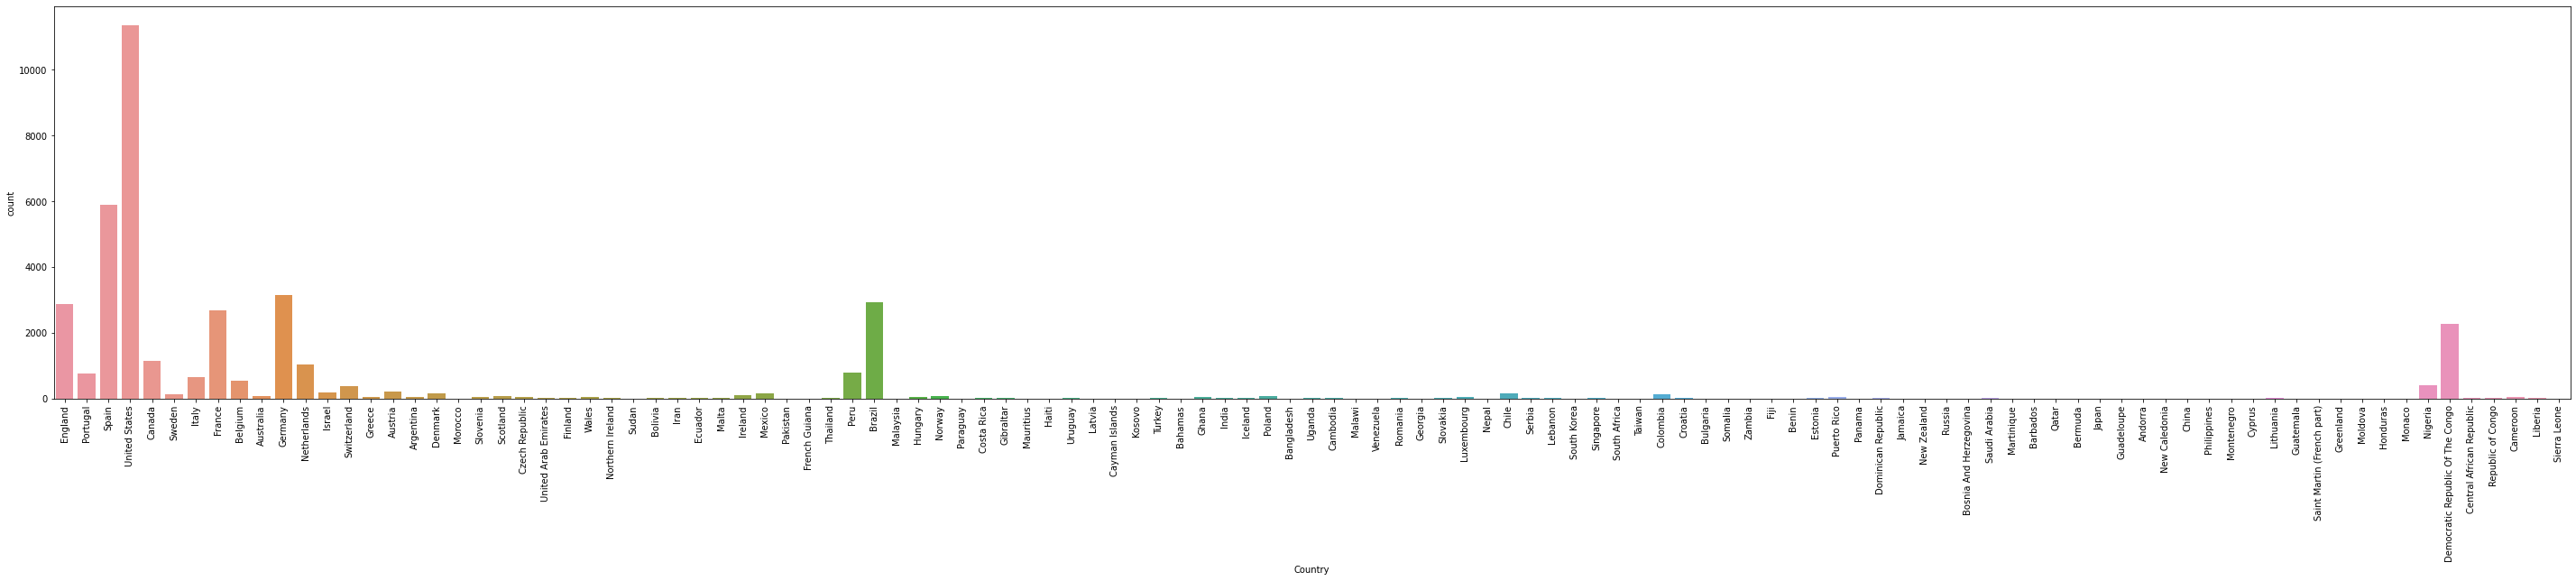

In [ ]:
countrycases()

In [ ]:
#due to the USA's high monkeypox count i will further breakdown its cases based on cities

#REMEMBER TO REWRITE YOUR CODE, ITS NOT PRINTING IT IN THE FORMAT YOU WANT!!!

df[df["Country"] == "United States"].groupby("City")["Status"].size()

City
Anchorage         2
Austin            1
Boston            1
Chicago           7
Cincinnati        2
Cleveland         1
Dallas            1
Denver            1
Forest Park       1
Houston           2
Kansas City       2
Louisville        2
Milwaukee         1
Nashville         3
Philadelphia      2
Sacramento        1
San Francisco    20
San Francsico    16
St. Louis         1
Washington DC     1
Name: Status, dtype: int64